In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
import calendar
from math import sin, cos, sqrt, atan2, radians, asin
from geopy.distance import great_circle
from datetime import timedelta
import datetime as dt
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')
import pickle
from geopy.distance import geodesic

In [2]:
train = pd.read_csv("C:/Users/dhruv/Downloads/new-york-city-taxi-fare-prediction/train.csv", engine = 'python', nrows = 6000000)
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 8 columns):
key                  object
fare_amount          float64
pickup_datetime      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
dtypes: float64(5), int64(1), object(2)
memory usage: 366.2+ MB


In [4]:
#Changing the datatype of the pickup_datetime field from Object to datetime

train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
train['pickup_date']=train['pickup_datetime'].dt.date
train['pickup_day']=train['pickup_datetime'].apply(lambda x:x.day)
train['pickup_hour']=train['pickup_datetime'].apply(lambda x:x.hour)
train['pickup_day_of_week']=train['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train['pickup_month']=train['pickup_datetime'].apply(lambda x:x.month)
train['pickup_year']=train['pickup_datetime'].apply(lambda x:x.year)

In [6]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [7]:
train[pd.isnull(train)].sum()

key                   0.0
fare_amount           0.0
pickup_datetime       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
passenger_count       0.0
pickup_date           0.0
pickup_day            0.0
pickup_hour           0.0
pickup_day_of_week    0.0
pickup_month          0.0
pickup_year           0.0
dtype: float64

Text(0.5, 1.0, 'Trip Fair Distribution')

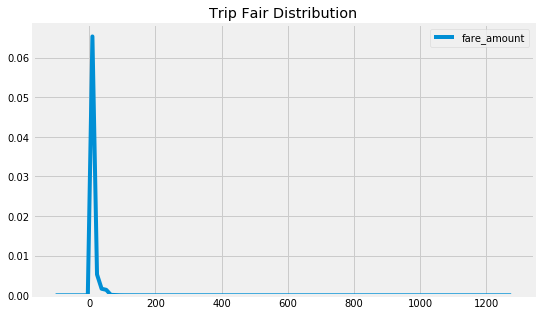

In [8]:
#Distribution of trip fare
plt.figure(figsize=(8,5))
sns.kdeplot(train['fare_amount']).set_title("Trip Fair Distribution")

In [9]:
#Checking for negative fare amounts

train.loc[train['fare_amount']<0].shape

(262, 14)

In [10]:
#Removing rows that have a negative fare amount

train = train.loc[train['fare_amount']>=0]
train.shape

(5999738, 14)

In [11]:
np.log(train['fare_amount'].values)

array([1.5040774 , 2.82731362, 1.74046617, ..., 3.2684276 , 2.55722731,
       1.87180218])

In [12]:
#Distribution of Pickup and Dropoff Latitude and longitude
print("Range of pickup latitude is ", (min(train['pickup_latitude']), max(train['pickup_latitude'])))

Range of pickup latitude is  (-3488.079513, 3344.459268)


In [13]:
#Distribution of Pickup and Dropoff Latitude and longitude
print("Range of dropoff latitude is ", (min(train['dropoff_latitude']), max(train['dropoff_latitude'])))

Range of dropoff latitude is  (-3488.079513, 3345.9173530000003)


In [14]:
#Checking test dataset for the range of pickup and dropoff latitude to get rid of outliers
test = pd.read_csv("C:/Users/dhruv/Downloads/new-york-city-taxi-fare-prediction/test.csv")
print("Longitude Boundary in test data")
min(test.pickup_longitude.min(), test.dropoff_longitude.min()),max(test.pickup_longitude.max(), test.dropoff_longitude.max())

Longitude Boundary in test data


(-74.263242, -72.986532)

In [15]:
print("Latitude Boundary in test data")
min(test.pickup_latitude.min(), test.pickup_latitude.min()),max(test.pickup_latitude.max(), test.pickup_latitude.max())

Latitude Boundary in test data


(40.573143, 41.709555)

In [16]:
boundary = { 'min_lng': -74.263242,
            'min_lat':40.573143,
            'max_lng':-72.986532,
            'max_lat':41.709555}

In [17]:
#Checking for outlier values for latitude and longitude

train[(train.pickup_latitude == 0) | (train.pickup_longitude == 0)
     |(train.dropoff_latitude == 0) | (train.dropoff_longitude == 0)].shape

(119459, 14)

In [18]:
train.loc[~((train.pickup_longitude >= boundary['min_lng'])
           &(train.pickup_longitude <= boundary['max_lng'])
           &(train.pickup_latitude >= boundary['min_lat'])
           &(train.pickup_latitude <= boundary['max_lat'])
           &(train.dropoff_longitude >= boundary['min_lng'])
           &(train.dropoff_longitude <= boundary['max_lng'])
           &(train.dropoff_latitude >= boundary['min_lat'])
           &(train.dropoff_latitude <= boundary['max_lat'])),
         'is_outlier_loc'] = 1

train.loc[((train.pickup_longitude >= boundary['min_lng'])
           &(train.pickup_longitude <= boundary['max_lng'])
           &(train.pickup_latitude >= boundary['min_lat'])
           &(train.pickup_latitude <= boundary['max_lat'])
           &(train.dropoff_longitude >= boundary['min_lng'])
           &(train.dropoff_longitude <= boundary['max_lng'])
           &(train.dropoff_latitude >= boundary['min_lat'])
           &(train.dropoff_latitude <= boundary['max_lat'])),
         'is_outlier_loc'] = 0

print("Outlier vs Non outlier counts")
print(train['is_outlier_loc'].value_counts())

Outlier vs Non outlier counts
0.0    5871295
1.0    128443 
Name: is_outlier_loc, dtype: int64


In [19]:
#Removing rows with outlier values for latitude and longitude

train.shape
train = train.loc[train['is_outlier_loc'] == 0]
train.drop(['is_outlier_loc'], axis = 1, inplace = True)
train.shape

(5871295, 14)

(-74.03, -73.75)

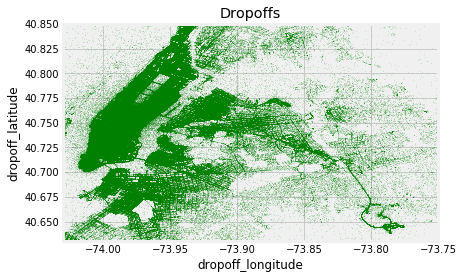

In [20]:
#Scatter map of dropoff locations in NYC
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

train.plot(kind='scatter', x = 'dropoff_longitude', y = 'dropoff_latitude', color = 'green', s = 0.02, alpha = 0.6)
plt.title("Dropoffs")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)


(-74.03, -73.75)

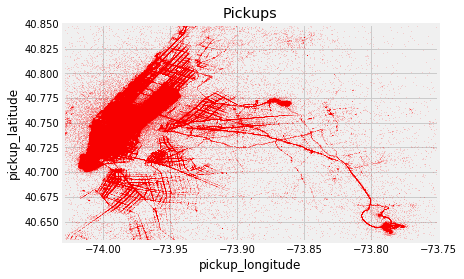

In [21]:
#Scatter map of pickup locations in NYC

train.plot(kind='scatter', x = 'pickup_longitude', y = 'pickup_latitude', color = 'red', s = 0.02, alpha = 0.6)
plt.title("Pickups")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)


In [22]:
#Converting latitude and longitude values to 3 decimal places

train['pickup_latitude_round3']=train['pickup_latitude'].apply(lambda x:round(x,3))
train['pickup_longitude_round3']=train['pickup_longitude'].apply(lambda x:round(x,3))
train['dropoff_latitude_round3']=train['dropoff_latitude'].apply(lambda x:round(x,3))
train['dropoff_longitude_round3']=train['dropoff_longitude'].apply(lambda x:round(x,3))

In [23]:
pickup_fare_amount = train.groupby(['pickup_latitude_round3', 'pickup_longitude_round3'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare'})
pickup_fare_amount.head()

,pickup_latitude_round3,pickup_longitude_round3,avg_fare
0,40.573,-74.228,8.5
1,40.573,-73.983,13.5
2,40.574,-74.243,5.7
3,40.574,-74.224,4.1
4,40.574,-74.223,4.5


In [24]:
#Checking for trips that are made to and from JFK airport in NYC

JFK={'min_lng':-73.8352,
     'min_lat':40.6195,
     'max_lng':-73.7401, 
     'max_lat':40.6659}
JFK_center=[40.6437,-73.7900]
JFK_pickup = train.loc[(train.pickup_latitude >= JFK['min_lat'])
                    &(train.pickup_latitude <= JFK['max_lat'])
                    &(train.pickup_longitude >= JFK['min_lng'])
                    &(train.pickup_longitude <= JFK['max_lng'])]

print("Number of pickups from JFK", JFK_pickup.shape[0])

JFK_dropoff = train.loc[(train.dropoff_latitude >= JFK['min_lat'])
                    &(train.dropoff_latitude <= JFK['max_lat'])
                    &(train.dropoff_longitude >= JFK['min_lng'])
                    &(train.dropoff_longitude <= JFK['max_lng'])]

print("Number of dropoffs at JFK", JFK_dropoff.shape[0])

Number of pickups from JFK 90182
Number of dropoffs at JFK 45609


In [27]:
nyc_airports={
    'JFK':
    {'min_lng':-73.8352,
     'min_lat':40.6195,
     'max_lng':-73.7401, 
     'max_lat':40.6659
    },              
    'EWR':
    {'min_lng':-74.1925,
            'min_lat':40.6700, 
            'max_lng':-74.1531, 
            'max_lat':40.7081
    },
    'LaGuardia':
    {'min_lng':-73.8895, 
                  'min_lat':40.7664, 
                  'max_lng':-73.8550, 
                  'max_lat':40.7931   
    }
}

def isAirport(latitude, longitude, airport_name='JFK'):
    if latitude>=nyc_airports[airport_name]['min_lat'] and latitude<=nyc_airports[airport_name]['max_lat'] and longitude>=nyc_airports[airport_name]['min_lng'] and longitude<=nyc_airports[airport_name]['max_lng']:
        return 1
    else:
        return 0

In [28]:
train['is_pickup_JFK'] = train.apply(lambda row:isAirport(row['pickup_latitude'], row['pickup_longitude'], 'JFK'), axis = 1)
train['is_dropoff_JFK'] = train.apply(lambda row:isAirport(row['dropoff_latitude'], row['dropoff_longitude'], 'JFK'), axis = 1)

In [29]:
train['is_pickup_EWR'] = train.apply(lambda row:isAirport(row['pickup_latitude'], row['pickup_longitude'], 'EWR'), axis = 1)
train['is_dropoff_EWR'] = train.apply(lambda row:isAirport(row['dropoff_latitude'], row['dropoff_longitude'], 'EWR'), axis = 1)

In [30]:
train['is_pickup_la_guardia'] = train.apply(lambda row:isAirport(row['pickup_latitude'], row['pickup_longitude'], 'LaGuardia'), axis = 1)
train['is_dropoff_la_guardia'] = train.apply(lambda row:isAirport(row['dropoff_latitude'], row['dropoff_longitude'], 'LaGuardia'), axis = 1)

In [31]:
#Funtion to calculate trip distance in miles

def distance(lat1, lat2, lng1, lng2):
    p = 0.017453292519943295 
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lng2 - lng1)*p))/2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [33]:
#Calculating trip distance in miles

train['trip_distance']=train.apply(lambda row:distance(row['pickup_latitude'],row['dropoff_latitude'],row['pickup_longitude'],row['dropoff_longitude']), axis = 1)

In [35]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,...,pickup_longitude_round3,dropoff_latitude_round3,dropoff_longitude_round3,is_pickup_JFK,is_dropoff_JFK,is_pickup_EWR,is_dropoff_EWR,is_pickup_la_guardia,is_dropoff_la_guardia,trip_distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,...,-73.844,40.712,-73.842,0,0,0,0,0,0,0.640487
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,...,-74.016,40.782,-73.979,0,0,0,0,0,0,5.250670
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,...,-73.983,40.751,-73.991,0,0,0,0,0,0,0.863411
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,...,-73.987,40.758,-73.992,0,0,0,0,0,0,1.739386
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,...,-73.968,40.784,-73.957,0,0,0,0,0,0,1.242218


In [45]:
def groupandplot(groupby_key,value,aggregate='mean'):
    plt.figure(figsize=(16,10))
    agg_data=train.groupby([groupby_key])[value].agg(aggregate).reset_index().rename(columns={value:aggregate+'_'+value})
    plt.subplot(1,2,1)
    count_data=train.groupby([groupby_key])['key'].count().reset_index().rename(columns={'key':'Num_Trips'})
    sns.barplot(x=groupby_key,y='Num_Trips',data=count_data).set_title("Number of Trips vs "+groupby_key)
    
    plt.subplot(1,2,2)
    sns.barplot(x=groupby_key,y=aggregate+'_'+value,data=agg_data).set_title(aggregate+'_'+value+" vs "+groupby_key)

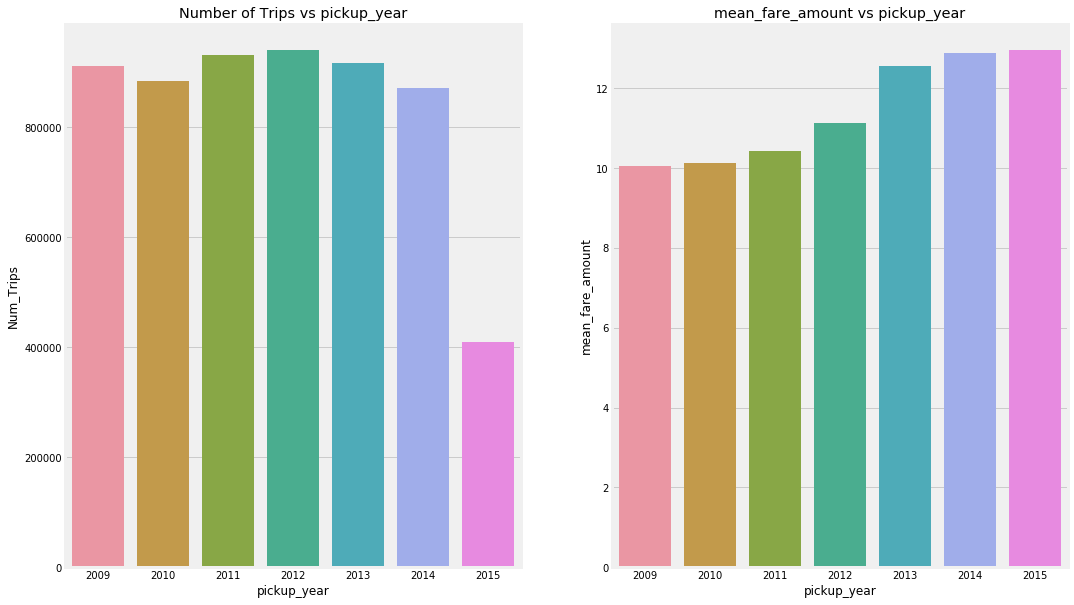

In [46]:
groupandplot('pickup_year', 'fare_amount')

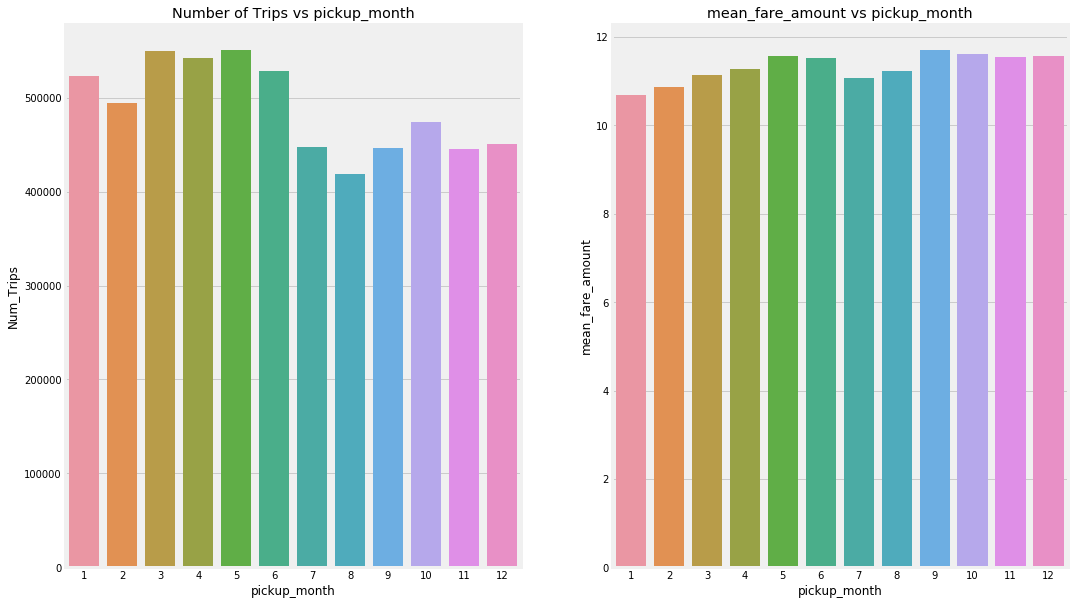

In [47]:
groupandplot('pickup_month', 'fare_amount')

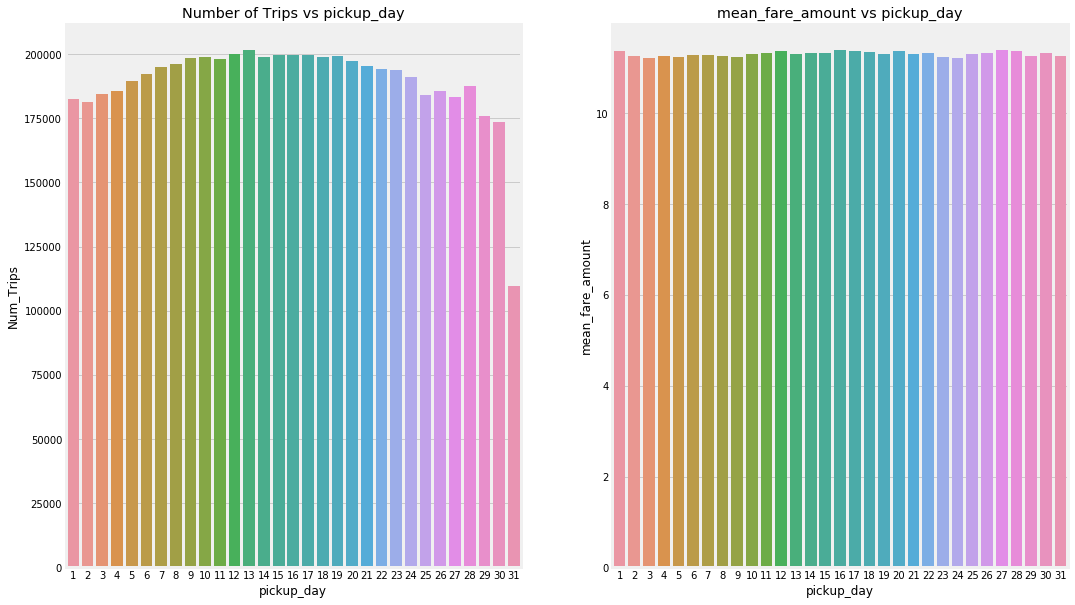

In [48]:
groupandplot('pickup_day', 'fare_amount')

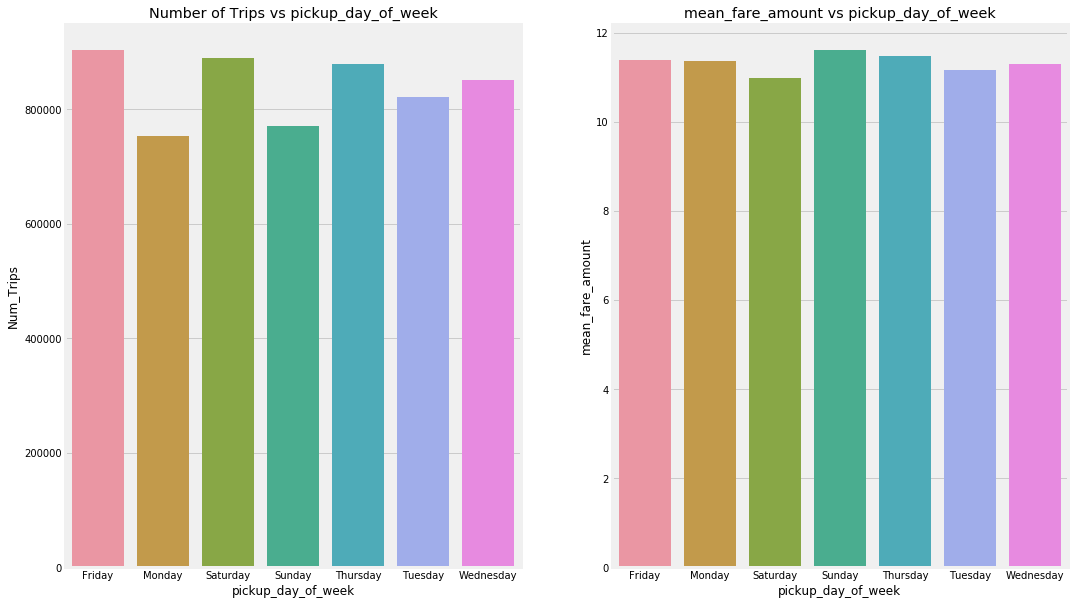

In [49]:
groupandplot('pickup_day_of_week', 'fare_amount')

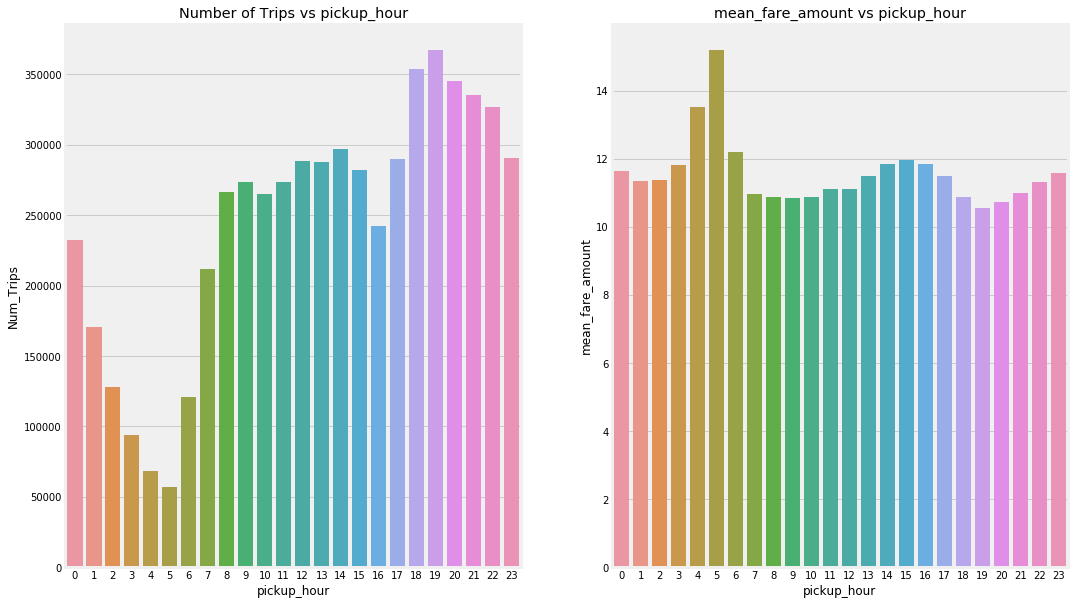

In [50]:
groupandplot('pickup_hour', 'fare_amount')

In [51]:
def encodeDays(day_of_week):
    day_dict={'Sunday':0,
             'Monday':1,
             'Tuesday':2,
             'Wednesday':3,
             'Thursday':4,
             'Friday':5,
             'Saturday':6}
    return day_dict[day_of_week]

train['pickup_day_of_week']=train['pickup_day_of_week'].apply(lambda x:encodeDays(x))

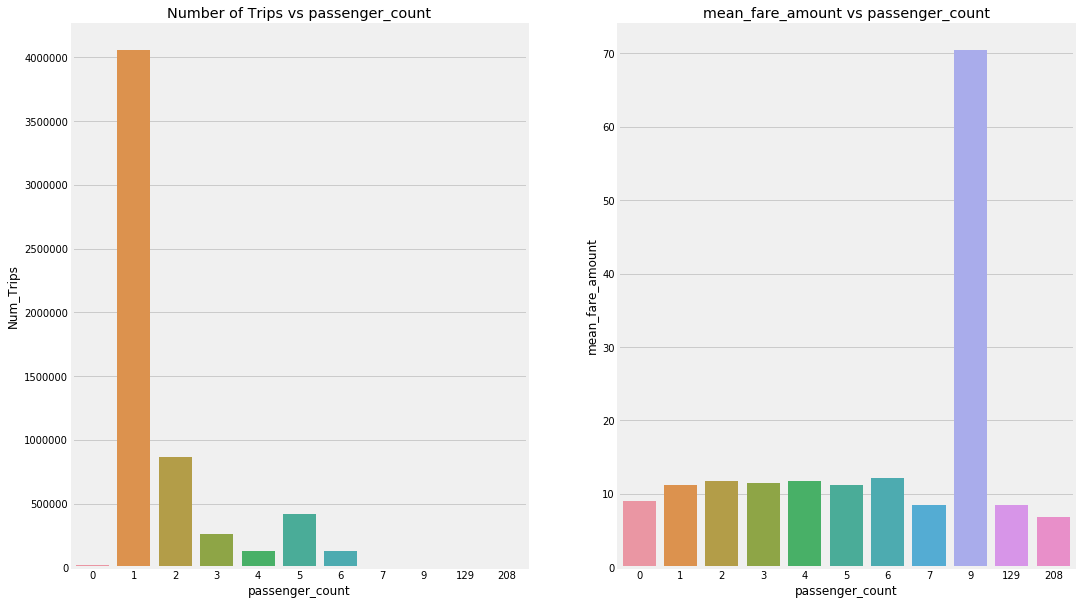

In [52]:
groupandplot('passenger_count', 'fare_amount')

In [53]:
#Removing trips with a passenger count of 9 and more and the test data does not have these outlier values

train=train[train['passenger_count']<=8]

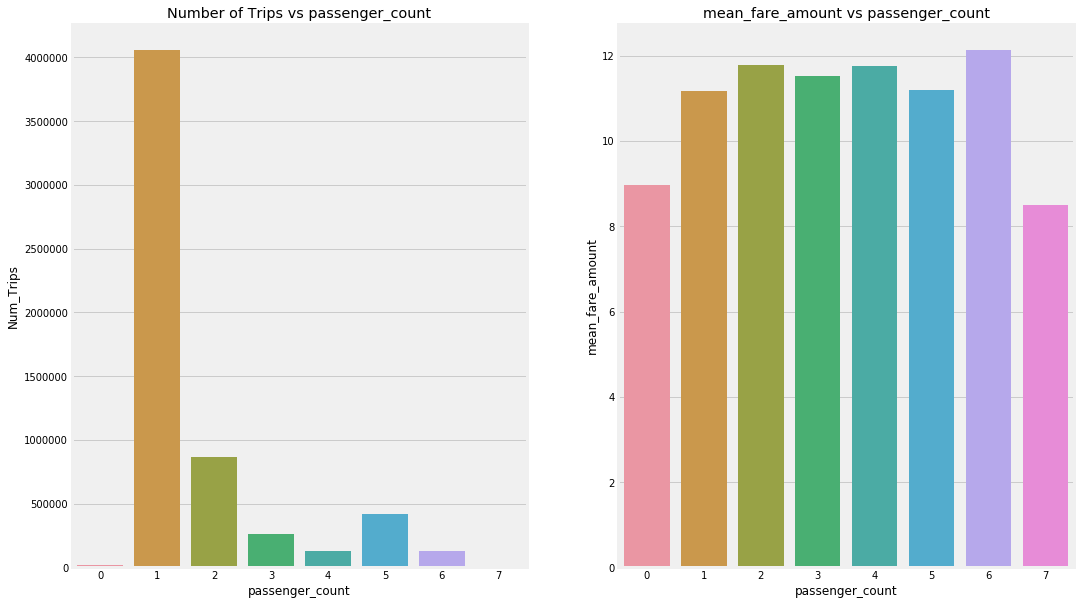

In [54]:
groupandplot('passenger_count','fare_amount')

In [56]:
train.to_csv('cleaned_train_data.csv', index = False)

In [60]:
#Adding all the additional fields for the test data

test = pd.read_csv("C:/Users/dhruv/Downloads/new-york-city-taxi-fare-prediction/test.csv")

test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

test['pickup_date']=test['pickup_datetime'].dt.date
test['pickup_day']=test['pickup_datetime'].apply(lambda x:x.day)
test['pickup_hour']=test['pickup_datetime'].apply(lambda x:x.hour)
test['pickup_day_of_week']=test['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
test['pickup_month']=test['pickup_datetime'].apply(lambda x:x.month)
test['pickup_year']=test['pickup_datetime'].apply(lambda x:x.year)

test['is_pickup_JFK']=test.apply(lambda row:isAirport(row['pickup_latitude'], row['pickup_longitude'], 'JFK'), axis = 1)
test['is_dropoff_JFK']=test.apply(lambda row:isAirport(row['dropoff_latitude'], row['dropoff_longitude'], 'JFK'), axis = 1)

test['is_pickup_EWR']=test.apply(lambda row:isAirport(row['pickup_latitude'], row['pickup_longitude'], 'EWR'), axis = 1)
test['is_dropoff_EWR']=test.apply(lambda row:isAirport(row['dropoff_latitude'], row['dropoff_longitude'], 'EWR'), axis = 1)

test['is_pickup_la_guardia']=test.apply(lambda row:isAirport(row['pickup_latitude'], row['pickup_longitude'], 'LaGuardia'), axis = 1)
test['is_dropoff_la_guardia']=test.apply(lambda row:isAirport(row['dropoff_latitude'], row['dropoff_longitude'], 'LaGuardia'), axis = 1)


test['pickup_latitude_round3']=test['pickup_latitude'].apply(lambda x:round(x,3))
test['pickup_longitude_round3']=test['pickup_longitude'].apply(lambda x:round(x,3))
test['dropoff_latitude_round3']=test['dropoff_latitude'].apply(lambda x:round(x,3))
test['dropoff_longitude_round3']=test['dropoff_longitude'].apply(lambda x:round(x,3))


test['pickup_day_of_week']=test['pickup_day_of_week'].apply(lambda x:encodeDays(x))
print("Shape of test data ", test.shape )
test.to_csv("cleaned_test_data.csv")


Shape of test data  (9914, 23)


In [61]:
train.shape

(5871290, 25)

In [62]:
test['trip_distance']=test.apply(lambda row:distance(row['pickup_latitude'], row['dropoff_latitude'], row['pickup_longitude'], row['dropoff_longitude']), axis = 1)

In [63]:
test.shape

(9914, 24)

In [65]:
test.to_csv("cleaned_test_data.csv", index = False)